In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from image_cropper import ImageCropper

In [35]:
input_image_path = "Images/sample_img_4.png"

In [36]:
## Read
img = cv2.imread(input_image_path)

## convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


mask = cv2.inRange(hsv, (37, 52, 68), (94, 255, 139))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

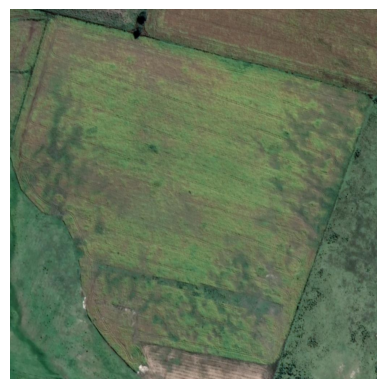

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

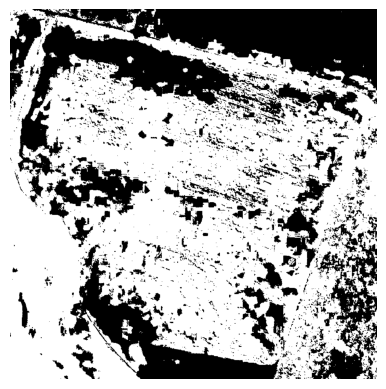

In [38]:
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

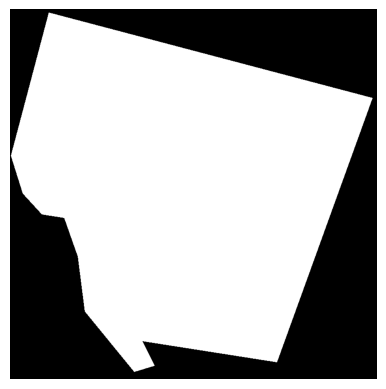

In [39]:
img_cropper = ImageCropper(input_image_path)
img_cropper.run()
area_to_remove = img_cropper.mask

plt.imshow(cv2.cvtColor(area_to_remove, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [40]:
final_img = img.copy()

# Highlight greens
mask_indices = mask > 0
opacity = 0.2
final_img[mask_indices] = ((1- opacity) * final_img[mask_indices] + opacity * np.array([0,255,0]))

# Dim Unwanted areas
mask_indices = (area_to_remove == 0)
opacity = 0.7
final_img[mask_indices] = ((1- opacity) * final_img[mask_indices] + opacity * np.array([0,0,0]))

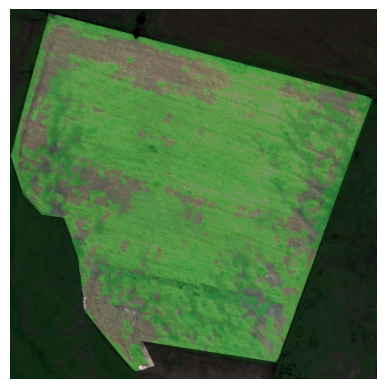

In [44]:
plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

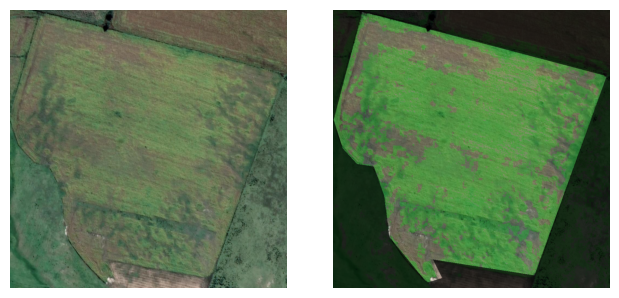

In [41]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2)

# Display the first image in the first subplot
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot with both images
axs[1].imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
axs[1].axis('off')
plt.show()

In [43]:
relevant_area = mask[area_to_remove > 0]

green_ratio = np.count_nonzero(relevant_area) / relevant_area.shape[0]
print("The green surface area is of ", round(green_ratio * 100, 1), "%")

The green surface area is of  70.4 %
